### Árbol de Decisiciones

Segmentar el dataset en ramas para que el modelo lo recorra, un conjunto de árboles de decisiones formará un random forest :P

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier

In [22]:
def visualize_classifier(classifier,X,y,title=''):
    min_x, max_x = X[:, 0].min() -1.0, X[:, 0].max()+1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max()+1.0
    
    mesh_step_size = 0.01
    x_vals,y_vals = np.meshgrid(np.arange(min_x,max_x,mesh_step_size),np.arange(min_y,max_y,mesh_step_size))
    output = classifier.predict(np.c_[x_vals.ravel(),y_vals.ravel()])
    
    output = output.reshape(x_vals.shape)
    plt.figure()
    plt.title(title)
    plt.pcolormesh(x_vals,y_vals,output,cmap=plt.cm.gray)
    
    plt.scatter(X[:,0], X[:,1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)
    plt.xlim(x_vals.min(),x_vals.max())
    plt.ylim(y_vals.min(),y_vals.max())
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))
    plt.show()

In [7]:
inputfile = './Datos/data_decision_trees.txt'
data = np.loadtxt(inputfile,delimiter=',')
X,y = data[:,:-1],data[:,-1]

In [9]:
class0 = np.array(X[y==0])
class1 = np.array(X[y==1])

Text(0.5, 1.0, 'Input data')

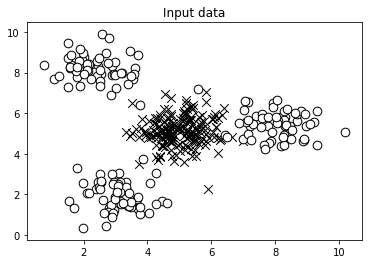

In [11]:
plt.figure()
plt.scatter(class0[:,0],class0[:,1],s=75,facecolors='black',edgecolors='black',linewidth=1,marker='x')
plt.scatter(class1[:,0],class1[:,1],s=75,facecolors='white',edgecolors='black',linewidth=1,marker='o')
plt.title('Input data')

In [12]:
#Random_state es el estado incicial del random (semilla)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 5)

In [13]:
classifier=DecisionTreeClassifier(random_state=0, max_depth = 4)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

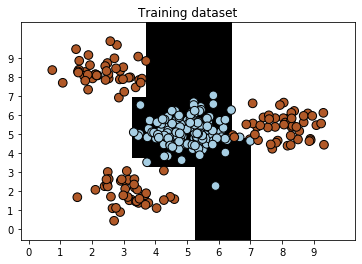

In [23]:
visualize_classifier(classifier, X_train, y_train,'Training dataset')

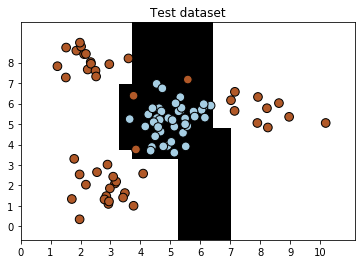

In [25]:
y_test_prod = classifier.predict(X_test)
visualize_classifier(classifier,X_test,y_test,'Test dataset')

In [28]:
class_names = ['Class-0','Class-1']
print('\n' + '#'*60)
print('\nDesempeño del clasificador en el dataset en entrenamiento\n')
print(classification_report(y_train,classifier.predict(X_train),target_names=class_names))
print('\n' + '#'*60+'\n')
print('\n' + '#'*60)
print('\nDesempeño del clasificador en el dataset de prueba\n')
print(classification_report(y_test,y_test_prod,target_names=class_names))
print('\n' + '#'*60+'\n')


############################################################

Desempeño del clasificador en el dataset en entrenamiento

              precision    recall  f1-score   support

     Class-0       0.99      1.00      1.00       137
     Class-1       1.00      0.99      1.00       133

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270


############################################################


############################################################

Desempeño del clasificador en el dataset de prueba

              precision    recall  f1-score   support

     Class-0       0.93      1.00      0.97        43
     Class-1       1.00      0.94      0.97        47

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90


#############################################

In [34]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
input_file = './Datos/data_random_forests.txt'
data = np.loadtxt(input_file,delimiter=',')
X,y = data[:,:-1], data[:,-1]

class0 = np.array(X[y==0])
class2 = np.array(X[y==2])
class1 = np.array(X[y==1])


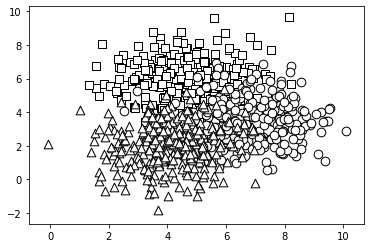

In [35]:
plt.figure()
plt.scatter(class0[:,0],class0[:,1],s=75,facecolors='white',edgecolors='black',linewidth=1,marker='s')
plt.scatter(class1[:,0],class1[:,1],s=75,facecolors='white',edgecolors='black',linewidth=1,marker='o')
plt.scatter(class2[:,0],class2[:,1],s=75,facecolors='white',edgecolors='black',linewidth=1,marker='^')

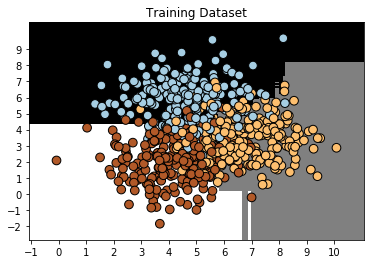

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 5)
classifier = RandomForestClassifier(n_estimators=100,max_depth=4,random_state=0) 
# número de árboles(n_estimators) y la profundidad de los árboles(max_depth)
classifier.fit(X_train,y_train)
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier,X_train,y_train,'Training Dataset')

Nota: Si hay mucha dispersión es recomendable utilizar random forest

In [38]:
class_names = ['Class-0','Class-1','Class-2']
print('\n' + '#'*60)
print('\nDesempeño del clasificador en el dataset en entrenamiento\n')
print(classification_report(y_train,classifier.predict(X_train),target_names=class_names))
print('\n' + '#'*60+'\n')
print('\n' + '#'*60)
print('\nDesempeño del clasificador en el dataset de prueba\n')
print(classification_report(y_test,y_test_pred,target_names=class_names))
print('\n' + '#'*60+'\n')


############################################################

Desempeño del clasificador en el dataset en entrenamiento

              precision    recall  f1-score   support

     Class-0       0.91      0.86      0.88       221
     Class-1       0.84      0.87      0.86       230
     Class-2       0.86      0.87      0.86       224

    accuracy                           0.87       675
   macro avg       0.87      0.87      0.87       675
weighted avg       0.87      0.87      0.87       675


############################################################


############################################################

Desempeño del clasificador en el dataset de prueba

              precision    recall  f1-score   support

     Class-0       0.92      0.85      0.88        79
     Class-1       0.86      0.84      0.85        70
     Class-2       0.84      0.92      0.88        76

    accuracy                           0.87       225
   macro avg       0.87      0.87      0.87    

In [39]:
#En este random forest la precisión del recall en test no es 1
def resumen_clasificacion (class_names):
    print('\n' + '#'*60)
    print('\nDesempeño del clasificador en el dataset en entrenamiento\n')
    print(classification_report(y_train,classifier.predict(X_train),target_names=class_names))
    print('\n' + '#'*60+'\n')
    print('\n' + '#'*60)
    print('\nDesempeño del clasificador en el dataset de prueba\n')
    print(classification_report(y_test,y_test_pred,target_names=class_names))
    print('\n' + '#'*60+'\n')

- recall: Del total de positivos que había en la data ¿cuántos se identificaron de forma correcta?
- precision: Datos que se clasificaron

## Predicción con datos nuevos


Datapoint: [5 5]
Clase predecida: Class-0

Datapoint: [3 6]
Clase predecida: Class-0

Datapoint: [6 4]
Clase predecida: Class-1

Datapoint: [7 2]
Clase predecida: Class-1

Datapoint: [4 4]
Clase predecida: Class-2

Datapoint: [5 2]
Clase predecida: Class-2


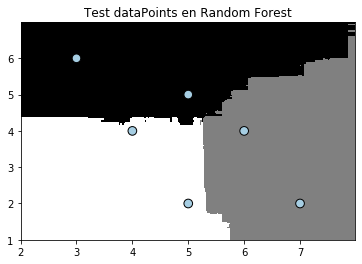

In [43]:
test_datapoints = np.array([[5,5],[3,6],[6,4],[7,2],[4,4],[5,2]])

for datapoint in test_datapoints:
    probabilities = classifier.predict_proba([datapoint])[0]
    predicted_class = 'Class-'+str(np.argmax(probabilities))
    print('\nDatapoint:',datapoint)
    print('Clase predecida:',predicted_class)
visualize_classifier(classifier,test_datapoints,[0]*len(test_datapoints),'Test dataPoints en Random Forest')

### Máquinas de soporte Vectorial SVM para clasificaciones

In [44]:
from sklearn import preprocessing
from sklearn.svm import LinearSVC
#Support Vector Classifier
from sklearn.multiclass import OneVsOneClassifier

In [60]:
input_file = './Datos/income_data.txt'
X = []
y = []
count_class1 = 0
count_class2 = 0
max_datapoints = 25000

In [61]:
with open(input_file,'r') as f:
    for line in f.readlines():
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
            break
        if '?' in line:
            continue
        data = line[:-1].split(',')
        if data[-1] == ' <=50K' and count_class1 < max_datapoints:
            X.append(data)
            count_class1 +=1
        if data[-1] == ' >50K' and count_class2 < max_datapoints:
            X.append(data)
            count_class2 += 1
X = np.array(X)


In [66]:
label_encoder = []
X_encoded = np.empty(X.shape)

for i, item in enumerate(X[0]):
    if item.isdigit():
        X_encoded[:,i] = X[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:,i] = label_encoder[-1].fit_transform(X[:,i])
        
X = X_encoded[:,:-1].astype(int)
y = X_encoded[:,-1].astype(int)

In [67]:
print(X)

[[   39     5 19135 ...     0    34    38]
 [   50     4 19377 ...     0     4    38]
 [   38     2  9636 ...     0    34    38]
 ...
 [   58     2  3787 ...     0    34    38]
 [   22     2  8486 ...     0    12    38]
 [   52     3 13387 ...     0    34    38]]


In [76]:
#Entre más iteraciones hay menor precisión, el max_iter default es 1000
classifier = OneVsOneClassifier(LinearSVC(random_state=0, max_iter=1000))
classifier.fit(X,y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
classifier.fit(X_train,y_train)
Y_test_pred = classifier.predict(X_test)

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [77]:
f1 = cross_val_score(classifier, X,y, scoring='f1_weighted',cv=3)
print('F1 score =' +str(round(f1.mean()*100, 2))+'%')

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


F1 score =72.95%


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [79]:
from sklearn import neighbors

input_file = './Datos/data.txt'
data = np.loadtxt(input_file,delimiter=',')
X,y = data[:,:-1],data[:,-1].astype(np.int)

In [87]:
import matplotlib.cm as cm

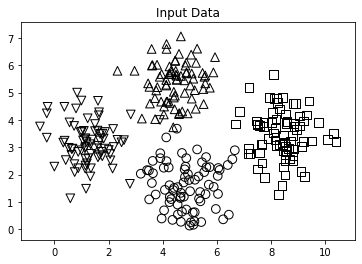

In [82]:
plt.figure()
plt.title('Input Data')
marker_shapes='v^os'
mapper = [marker_shapes[i] for i in y]
for i in range(X.shape[0]):
    plt.scatter(X[i,0],X[i,1],marker = mapper[i], s= 75,edgecolor = 'black',facecolors='none')

In [84]:
num_neighbors= 12
step_size = 0.01
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights = 'distance')

In [85]:
classifier.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='distance')

In [86]:
x_min,x_max=X[:, 0].min() - 1,X[:,0].max()+1
y_min,y_max=X[:, 1].min() - 1,X[:,1].max()+1
x_values, y_values = np.meshgrid(np.arange(x_min,x_max,step_size),np.arange(y_min,y_max,step_size))

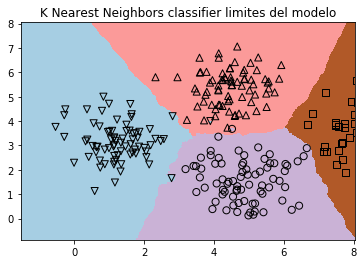

In [92]:
output=classifier.predict(np.c_[x_values.ravel(),y_values.ravel()])
output = output.reshape(x_values.shape)
plt.figure()
plt.pcolormesh(x_values,y_values,output,cmap=cm.Paired)

for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], marker=mapper[i],s=50, edgecolors='black',facecolors = 'none')
    plt.xlim(x_values.min(),y_values.max())
    plt.ylim(y_values.min(),y_values.max())
    plt.title('K Nearest Neighbors classifier limites del modelo')

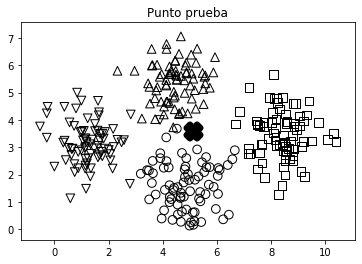

In [93]:
test_datapoint = [5.1,3.6]
plt.figure()
plt.title('Punto prueba')

for i in range(X.shape[0]):
    plt.scatter(X[i,0],X[i,1],marker=mapper[i],s=75,edgecolors='black',facecolors='none')
plt.scatter(test_datapoint[0],test_datapoint[1],marker='X',linewidth=6,s=200,facecolors='black')

Se van a encontrar los puntos cercanos al punto 'x' que se graficó antes

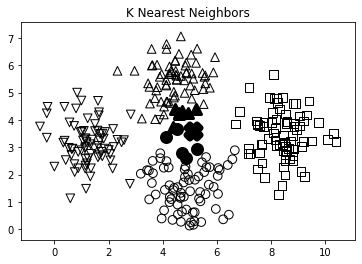

In [95]:
_, indices = classifier.kneighbors([test_datapoint])
indices = indices.astype(np.int)[0]
plt.figure()
plt.title('K Nearest Neighbors')
for i in indices:
    plt.scatter(X[i,0],X[i,1],marker=mapper[y[i]],linewidth = 3, s= 100, facecolors='black')
plt.scatter(test_datapoint[0],test_datapoint[1],marker='X',linewidth=6,s=200,facecolors='black')
for i in range(X.shape[0]):
    plt.scatter(X[i,0],X[i,1],marker = mapper[i],s=75,edgecolors='black',facecolors='none')
plt.show()